<a href="https://colab.research.google.com/github/fadoumly/Machine_learning/blob/main/1_EDA_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





**Nom : LY**

**Prénoms : Fadoum Ousmane**

Encadrant : M. SADE Julien

M1 STA2E parcours Biomics




---


---



## Introduction à l'analyse exploratoire des données (EDA)

L'Analyse exploratoire des données (EDA) constitue une étape fondamentale dans le processus d'analyse de données. Elle vise à comprendre les principales caractéristiques du jeu de données, identifier les relations potentielles entre les variables, détecter d'éventuelles anomalies ou valeurs aberrantes, et formuler des hypothèses pour des analyses plus approfondies. Cette démarche est essentielle pour garantir l'efficacité des modèles d'analyse statistique ou de machine learning ultérieurs.

**Présentation du jeu de données**

Le jeu de données pour ce notebook concerne des mesures relatives à des tumeurs diagnostiquées chez des patients, avec pour objectif de distinguer les tumeurs malignes des tumeurs bénignes. Chaque observation dans le jeu de données correspond à une tumeur et inclut des caractéristiques telles que le rayon, la texture, le périmètre, l'aire, la lissité, la compacité, la concavité, les points concaves, la symétrie, et la dimension fractale. Ces caractéristiques sont mesurées sous trois aspects : les moyennes, les erreurs standard, et les valeurs maximales ('worst') observées.

La variable cible, 'diagnosis', indique le diagnostic de la tumeur, où 'M' représente une tumeur maligne et 'B' une tumeur bénigne.

**Objectif de l'analyse**

L'objectif de l'EDA dans ce contexte est de réaliser une première inspection du jeu de données pour comprendre ses caractéristiques principales, notamment la distribution des variables explicatives et leur relation avec la variable cible 'diagnosis'. Cette phase permettra d'identifier les variables les plus pertinentes pour distinguer entre les tumeurs malignes et bénignes et de préparer le terrain pour des analyses plus poussées, telles que l'analyse non supervisée pour détecter des groupements naturels dans les données, et l'analyse supervisée pour construire un modèle prédictif de diagnostic de tumeur.

L'EDA s'appuiera sur des statistiques descriptives, des visualisations graphiques, et des tests de corrélation pour explorer les données, détecter des patterns ou des anomalies, et vérifier les hypothèses initiales sur les relations entre les variables.

**Préparation de l'environnement de travail**

Avant de plonger dans l'analyse des données, il est essentiel de préparer l'environnement de travail en important les bibliothèques nécessaires et en chargeant le jeu de données. Cette étape permet de s'assurer que tous les outils requis sont disponibles et prêts à l'emploi.

**Importation des bibliothèques nécessaires**  

Pour l'analyse exploratoire des données, plusieurs bibliothèques Python sont fréquemment utilisées pour la manipulation des données, les calculs statistiques et la visualisation. Voici comment importer les bibliothèques de base :

In [ ]:
# Import des librairies

import pandas as pd # ce package permet de charger les données et donc la Manipulation des données #pd=un alias donc a chaque fois que je veux utiliser panda, je met cet alisa là
import numpy as np # Calcul numérique vectorielle
import matplotlib.pyplot as plt # package pour la visualisation
import seaborn as sns # Package pour la Visualisation
#pandas profiling #permet d'explorer les données

**Chargement du jeu de données**

Après avoir importé les bibliothèques nécessaires, la prochaine étape est de charger le jeu de données pour l'analyse. Voici comment procéder avec pandas :

In [ ]:
# Chemin vers le fichier CSV contenant le jeu de données
file_path = './Cancer_Data.csv'

# Chargement du jeu de données dans un DataFrame pandas
data = pd.read_csv(file_path)

# Affichage des premières lignes pour vérifier le chargement correct du jeu de données
data.head(10) #M=MALIGNE ET B=BéNIGNE; DIAGNOSIS VA ETRE NOTRE VARIABLE CIBLE

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


# Nouvelle section

In [ ]:
# Dimensions du jeu de données

data.shape #On a 569 lignes(individus) et 33 descripteurs et variables cibles potentiellemnt

(569, 33)

In [ ]:
# Type de données
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## Nettoyage des données

Gestion valeurs manquantes

In [ ]:
# Valeurs manquantes

data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:

data['Unnamed: 32']
# Suppression des colonnes 'id'
data =  data.drop(columns=['id'])

# et 'Unnamed: 32'
data =  data.drop(columns=['Unnamed: 32'])


## Analyse de la structure des données - statistiques descriptives et visualisation


In [ ]:
# Stats

data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


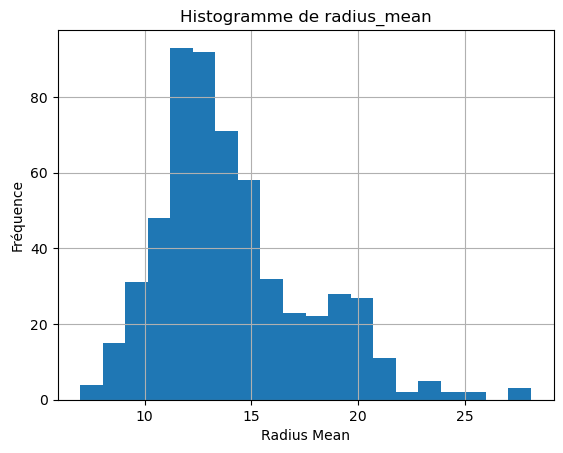

In [ ]:
# Histogramme: il ya plusieurs facons
data['radius_mean'].hist(bins=20) #radius_mean le descripteur qu'on veut afficher
plt.title('Histogramme de radius_mean') #titre du graphe
plt.xlabel('Radius Mean')
plt.ylabel('Fréquence')
plt.show()

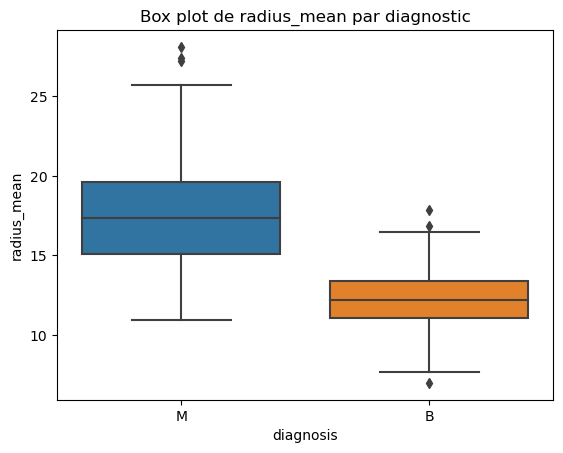

In [ ]:
# Exemple de box plot pour 'radius_mean'
sns.boxplot(x='diagnosis', y='radius_mean', data=data) #package siborn avec l'alias sns
plt.title('Box plot de radius_mean par diagnostic')
plt.show()

In [ ]:
# Quand la variable cible est qualitative, on la transforme en valeur numérique
#Conversion de 'diagnosis' en valeurs numériques : M -> 1, B -> 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# Calcul de la matrice de corrélation avec toutes les variables, y compris 'diagnosis'
correlation_matrix = data.corr()

**Exercice : Utiliser la fonction sns.heatmap() et sns.clustermap() pour tracer une heatmap des corrélations : https://seaborn.pydata.org/generated/seaborn.heatmap.html**

<Axes: >

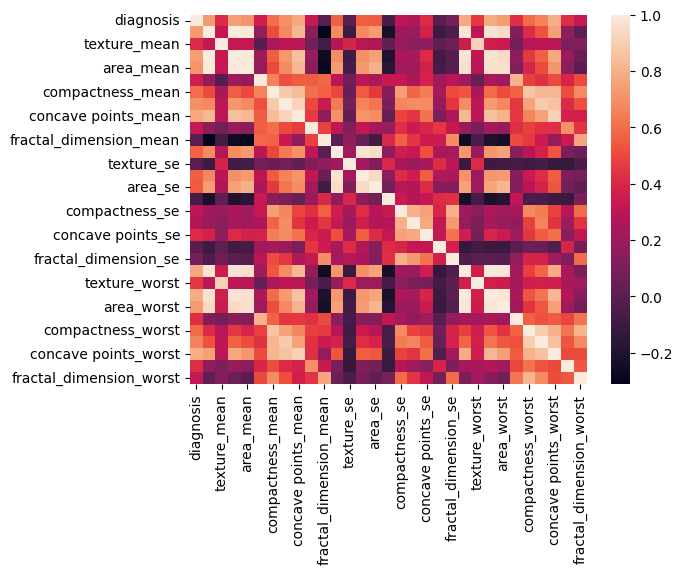

In [ ]:
# Heatmap

sns.heatmap(correlation_matrix)



In [ ]:
# Clustermap

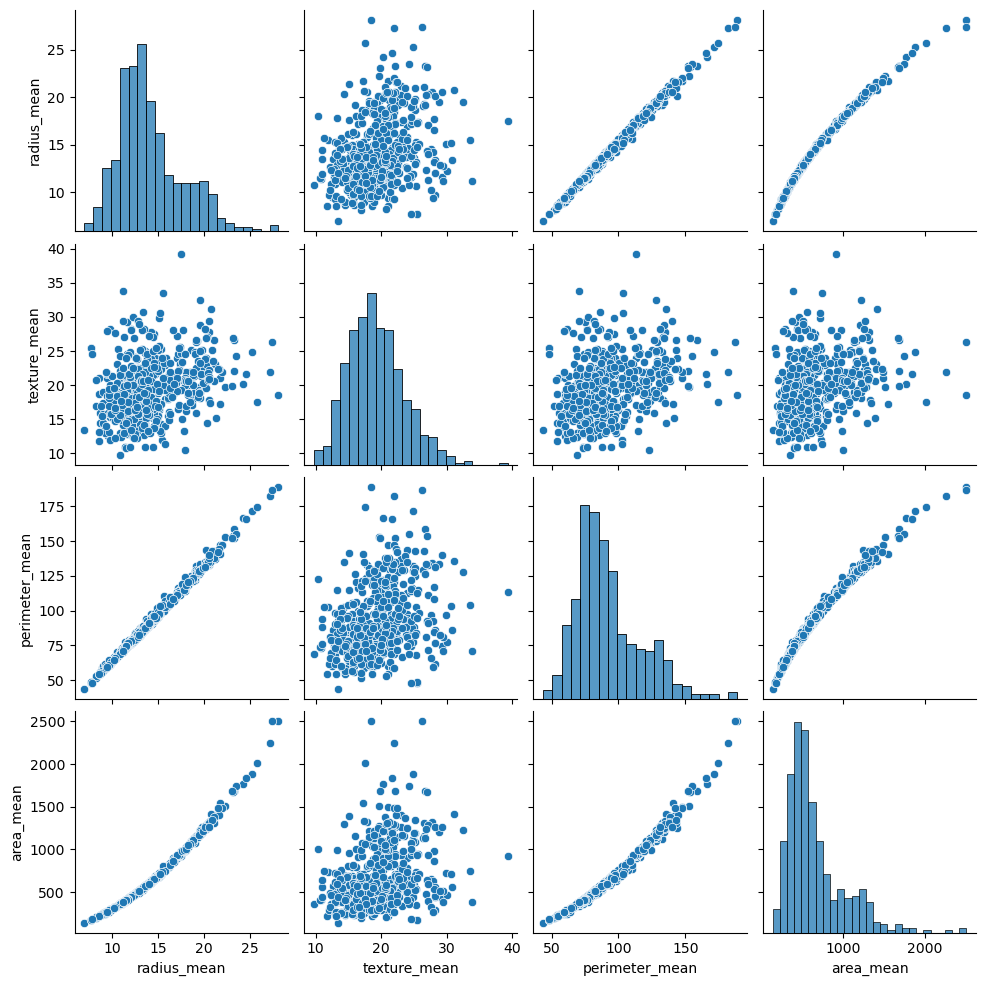

In [ ]:
selected_columns = data.columns[1:5]
sns.pairplot(data[selected_columns])
plt.show()

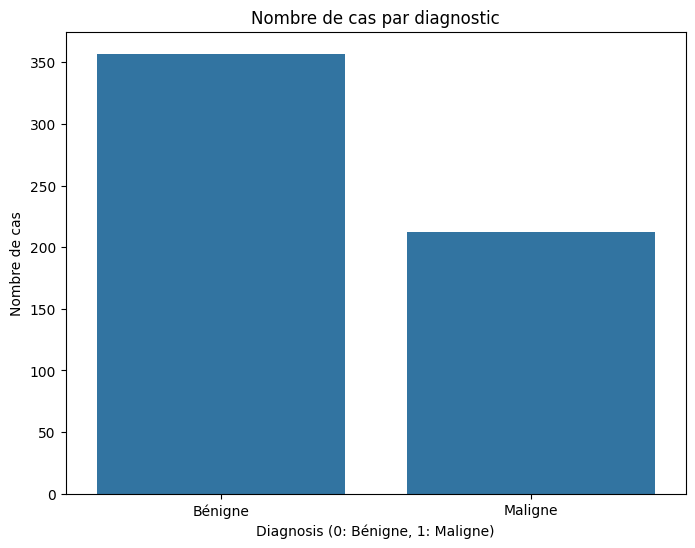

In [ ]:
diagnosis_lengths = data['diagnosis'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=diagnosis_lengths.index, y=diagnosis_lengths.values)
plt.title('Nombre de cas par diagnostic')
plt.xlabel('Diagnosis (0: Bénigne, 1: Maligne)')
plt.ylabel('Nombre de cas')
plt.xticks([0, 1], ['Bénigne', 'Maligne'])
plt.show()

In [ ]:
data.to_csv('cancer_afterEDA.csv', index=False)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
